<a href="https://colab.research.google.com/github/Sumit1412/DeepLearning/blob/main/mnist_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten


In [3]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [7]:
X_train = X_train/255
X_test = X_test/255

In [24]:
model = Sequential()
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(128,activation = 'relu'))
model.add(Dense(32,activation = 'relu'))
model.add(Dense(10,activation = 'softmax'))

In [25]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 128)               100480    
                                                                 
 dense_9 (Dense)             (None, 32)                4128      
                                                                 
 dense_10 (Dense)            (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.compile(loss = 'sparse_categorical_crossentropy',optimizer = 'Adam',metrics = 'accuracy')

In [27]:
history = model.fit(X_train,y_train,epochs = 25, validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2924 - accuracy: 0.9123 - val_loss: 0.1441 - val_accuracy: 0.9576
Epoch 2/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1193 - accuracy: 0.9637 - val_loss: 0.1086 - val_accuracy: 0.9659
Epoch 3/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0808 - accuracy: 0.9750 - val_loss: 0.0942 - val_accuracy: 0.9714
Epoch 4/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0587 - accuracy: 0.9818 - val_loss: 0.1004 - val_accuracy: 0.9713
Epoch 5/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0468 - accuracy: 0.9852 - val_loss: 0.0874 - val_accuracy: 0.9752
Epoch 6/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0369 - accuracy: 0.9879 - val_loss: 0.0886 - val_accuracy: 0.9758
Epoch 7/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0305 - accuracy: 0.9897 - val_loss: 0.1034 - val_accuracy:

In [28]:
y_prob = model.predict(X_test)

In [29]:
y_pred = y_prob.argmax(axis = 1)

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9769

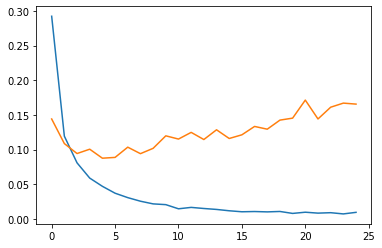

In [33]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

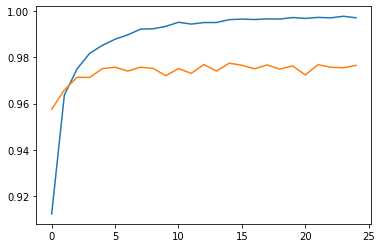

In [34]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

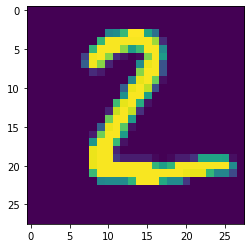

In [38]:
plt.imshow(X_test[1])

In [39]:
model.predict(X_test[1].reshape(1,28,28)).argmax(axis =1)

array([2])